In [1]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Main directory that includes training and validation directories
#main_dir = '../Data/genderbackup/'
#training_path = os.path.join (main_dir,'train')
#validation_path = os.path.join (main_dir,'val')
#test_path = os.path.join (main_dir,'test')
PATH = os.path.join('../Data/')

CHANNEL = 3 # Keep it 3 for colored images, make it 1 for grayscale
batch_size = 8 # Change it depending on your dataset size
# Image sizes depend on your preference and the model's requirements
IMG_HEIGHT = 150
IMG_WIDTH = 150

training_batches = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    shear_range=0.1,  # Peregangan gambar
    horizontal_flip=True,  # Flip horizontal gambar
    validation_split=0.1,
    fill_mode='nearest'  # Cara mengisi piksel kosong setelah augmentasi
).flow_from_directory (
    PATH,
    subset = 'training',
    seed=123,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary'
)

validation_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #shear_range=0.2,  # Peregangan gambar
    #zoom_range=0.2,  # Perbesaran gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    validation_split=0.1,
    #fill_mode='nearest'  # Cara mengisi piksel kosong setelah augmentasi
).flow_from_directory (
    PATH,
    seed=123,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    subset="validation", # subset for validation
    class_mode='binary'
)

test_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #shear_range=0.2,  # Peregangan gambar
    #zoom_range=0.2,  # Perbesaran gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    validation_split=0.1,
    #fill_mode='nearest'  # Cara mengisi piksel kosong setelah augmentasi
).flow_from_directory (
    PATH,
    seed=321,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    subset="validation",
    class_mode='binary'
)

Found 8803 images belonging to 2 classes.
Found 977 images belonging to 2 classes.
Found 977 images belonging to 2 classes.


In [3]:
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import MobileNet
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  base_model = MobileNet(weights='imagenet', include_top=False)
  base_model.trainable = True
  for layer in base_model.layers[:150]:
    layer.trainable = False
# ``
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(1028, activation='relu')(x)
  predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  #model = tf.keras.models.Sequential([ 
  #  tf.keras.layers.Rescaling(1./255),
  #    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Flatten(),
  #    tf.keras.layers.Dense(512,activation='relu'),
  #    tf.keras.layers.Dropout(0.5),
  #    tf.keras.layers.Dense(5,activation='softmax')
  #])

  
  model.compile(optimizer=Adam(learning_rate=1e-3),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [4]:
MONITOR = "val_accuracy"

def create_callbacks():
    
    cpk_path = '../Models/gender_models/6/'
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor=MONITOR,
        mode='max',
        save_best_only=True,
        verbose=1,
    )

    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor=MONITOR,
        mode='max',
        factor=0.1,
        patience=3,
        verbose=0
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor=MONITOR,
        mode='max',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

In [5]:
model = create_model()

#early_stopping = EarlyStopping(patience=6, verbose=1)
#callbacks =[early_stopping]
callbacks = create_callbacks()

history = model.fit(training_batches,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_batches,
                    #validation_steps=validation_steps
                    callbacks=callbacks
                    )

Epoch 1/100
1101/1101 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.7052
Epoch 1: val_accuracy improved from -inf to 0.59980, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 798s 721ms/step - loss: 0.6054 - accuracy: 0.7052 - val_loss: 0.6556 - val_accuracy: 0.5998 - lr: 0.0010
Epoch 2/100
1101/1101 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.7333
Epoch 2: val_accuracy improved from 0.59980 to 0.61924, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 643s 584ms/step - loss: 0.5175 - accuracy: 0.7333 - val_loss: 0.6295 - val_accuracy: 0.6192 - lr: 0.0010
Epoch 3/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4959 - accuracy: 0.7502
Epoch 3: val_accuracy improved from 0.61924 to 0.67247, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 375s 341ms/step - loss: 0.4959 - accuracy: 0.7502 - val_loss: 0.5523 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 4/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4943 - accuracy: 0.7434
Epoch 4: val_accuracy improved from 0.67247 to 0.72364, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 198s 180ms/step - loss: 0.4943 - accuracy: 0.7434 - val_loss: 0.5160 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 5/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.7505
Epoch 5: val_accuracy improved from 0.72364 to 0.75333, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 678s 616ms/step - loss: 0.4846 - accuracy: 0.7505 - val_loss: 0.4720 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 6/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.7659
Epoch 6: val_accuracy did not improve from 0.75333
1101/1101 [==============================] - 338s 307ms/step - loss: 0.4660 - accuracy: 0.7659 - val_loss: 0.5391 - val_accuracy: 0.6899 - lr: 0.0010
Epoch 7/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.7589
Epoch 7: val_accuracy improved from 0.75333 to 0.77277, saving model to ../Models/gender_models/6\


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 360s 327ms/step - loss: 0.4651 - accuracy: 0.7589 - val_loss: 0.4566 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 8/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4625 - accuracy: 0.7704
Epoch 8: val_accuracy did not improve from 0.77277
1101/1101 [==============================] - 608s 552ms/step - loss: 0.4625 - accuracy: 0.7704 - val_loss: 0.4565 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 9/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.7725
Epoch 9: val_accuracy did not improve from 0.77277
1101/1101 [==============================] - 368s 334ms/step - loss: 0.4561 - accuracy: 0.7725 - val_loss: 0.4358 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 10/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.7718
Epoch 10: val_accuracy did not improve from 0.77277
1101/1101 [==============================] - 286s 259ms/step - loss: 0.4546 - accuracy: 0.7718 - v

INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


INFO:tensorflow:Assets written to: ../Models/gender_models/6\assets


1101/1101 [==============================] - 176s 160ms/step - loss: 0.4306 - accuracy: 0.7881 - val_loss: 0.4474 - val_accuracy: 0.7820 - lr: 1.0000e-04
Epoch 14/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.7920
Epoch 14: val_accuracy did not improve from 0.78199
1101/1101 [==============================] - 163s 147ms/step - loss: 0.4199 - accuracy: 0.7920 - val_loss: 0.4571 - val_accuracy: 0.7564 - lr: 1.0000e-04
Epoch 15/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.7934
Epoch 15: val_accuracy did not improve from 0.78199
1101/1101 [==============================] - 161s 147ms/step - loss: 0.4180 - accuracy: 0.7934 - val_loss: 0.4632 - val_accuracy: 0.7503 - lr: 1.0000e-04
Epoch 16/100
1101/1101 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.7998
Epoch 16: val_accuracy did not improve from 0.78199
1101/1101 [==============================] - 169s 154ms/step - loss: 0.4178 - accu

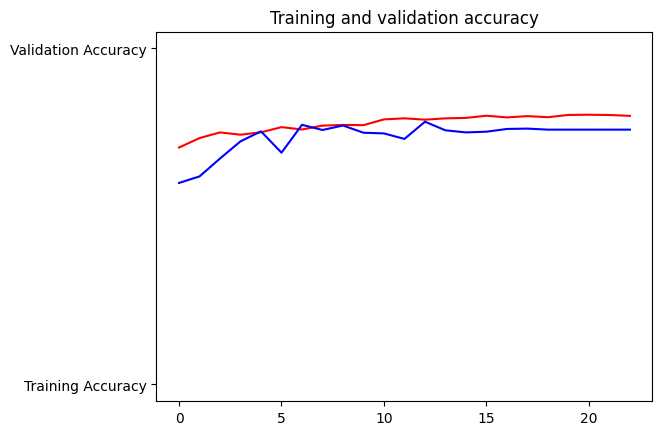

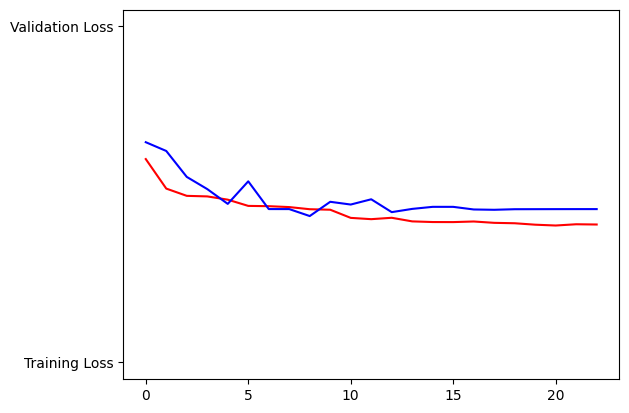

In [6]:
import matplotlib.pyplot as plt
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [13]:
model.evaluate(test_batches)

123/123 [==============================] - 11s 85ms/step - loss: 0.4474 - accuracy: 0.7820


[0.44743943214416504, 0.7819857001304626]

In [37]:
training_batches.class_indices

{'female': 0, 'male': 1}

In [8]:
class_name = ['female','male']

1/1 [==============================] - 0s 66ms/step
[[0.8606343]]
['female', 'male']
status :male


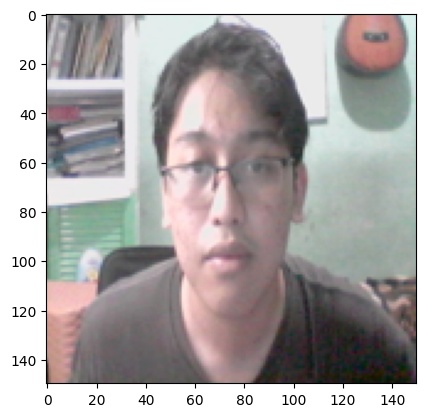

In [14]:
import PIL
import numpy as np
img = PIL.Image.open('C:/Users/ribhanhadyan/Pictures/Camera Roll/WIN_20230604_20_04_37_Pro.jpg')

img = img.resize((150,150))

image = np.array(img)/255.0
image = image.reshape((1,150,150,3))

predict = class_name[1 if model.predict(image)>=0.5 else 0]
print(model.predict(image))
print(class_name)
print(f'status :{predict}')
plt.imshow(img)

In [58]:
tf.keras.models.save_model(model,'../Models/gender_models/4/')

INFO:tensorflow:Assets written to: ../Models/gender_models/4/assets


INFO:tensorflow:Assets written to: ../Models/gender_models/4/assets


In [12]:
model.save('../Models/gender_models/6/model.h5')

In [11]:
model = tf.keras.models.load_model('../Models/gender_models/6/')